# EDA Balaji Fast Food Sales

### 1. Manipulação

#### 1.1 Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

#### 1.2 Coleta

In [3]:
df = pd.read_csv('Balaji Fast Food Sales.csv')
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


#### 1.3 Análise Preliminar

In [4]:
# Checando valores nulos
df.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [5]:
df[df.transaction_type.isnull()]

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
15,16,4/14/2022,Sandwich,Fastfood,60,11,660,NaN,Mrs.,Midnight
31,32,05-06-2022,Aalopuri,Fastfood,20,4,80,NaN,Mr.,Morning
40,41,11/13/2022,Cold coffee,Beverages,40,11,440,NaN,Mr.,Afternoon
46,47,07-10-2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Morning
...,...,...,...,...,...,...,...,...,...,...
987,988,01-03-2023,Frankie,Fastfood,50,13,650,NaN,Mrs.,Night
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening


In [6]:
# Checando valores duplicados
df.duplicated().sum()

0

#### 1.4 Tratamento

In [7]:
df.transaction_type.unique()

array([nan, 'Cash', 'Online'], dtype=object)

In [8]:
# Tratando valores nulos da coluna "transaction_type" 
df.loc[df.transaction_type.isnull(), 'transaction_type'] = 'Not Registered'
df.transaction_type.unique()

array(['Not Registered', 'Cash', 'Online'], dtype=object)

In [9]:
# Padronizando o separador das datas ("/" para "-")
df['date'] = df['date'].str.replace('/', '-')
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,Not Registered,Mr.,Night
1,2,8-23-2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11-20-2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


### 2. Análise dos Dados

#### 2.1 Qual a distribuição de tipos de transação?

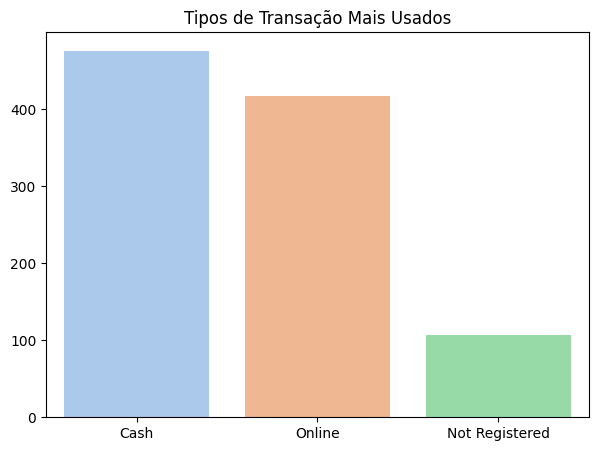

In [14]:
dados = df.groupby('transaction_type')['transaction_type'].count().sort_values(ascending=False)

plt.figure(figsize=(7,5))
grafico = sns.barplot(x=dados.index, y=dados.values, palette='pastel')
grafico.set(title='Tipos de Transação Mais Usados', xlabel='', ylabel='')
plt.show()

#### 2.2 Quais são os tipos de itens mais vendidos?

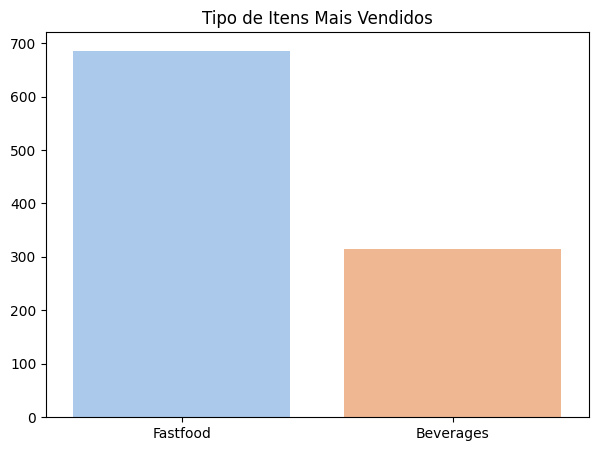

In [15]:
dados = df.groupby('item_type')['item_type'].count().sort_values(ascending=False)

plt.figure(figsize=(7,5))
grafico = sns.barplot(x=dados.index, y=dados.values, palette='pastel')
grafico.set(title='Tipo de Itens Mais Vendidos', xlabel='', ylabel='')
plt.show()

#### 2.3 Como está distribuída a quantidade de itens por pedido?

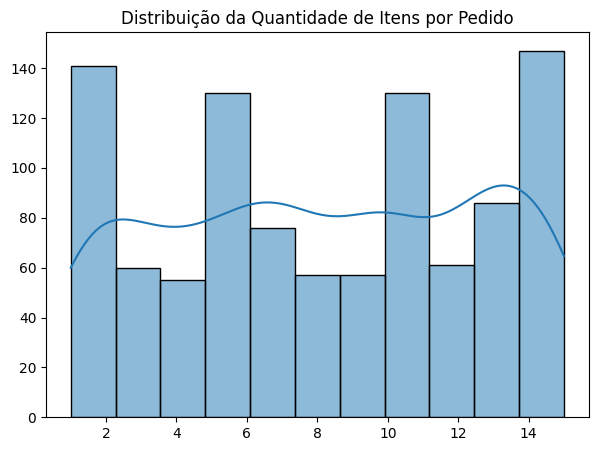

In [16]:
plt.figure(figsize=(7,5))
grafico = sns.histplot(df['quantity'], kde=True)
grafico.set(title='Distribuição da Quantidade de Itens por Pedido', xlabel='', ylabel='')
plt.show()

#### 2.4 Qual é o valor total de faturamento para cada item?

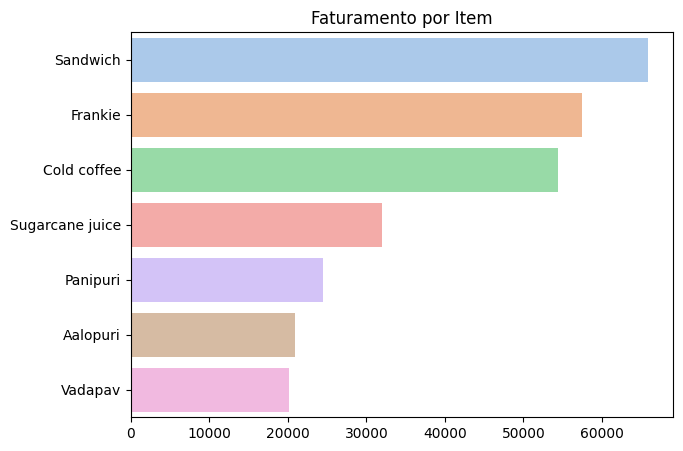

In [18]:
dados = df.groupby('item_name')['transaction_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(7,5))
grafico = sns.barplot(x=dados.values, y=dados.index, palette='pastel')
grafico.set(title='Faturamento por Item', xlabel='', ylabel='')
plt.show()

#### 2.5 Como os preços unitários estão distribuídos?

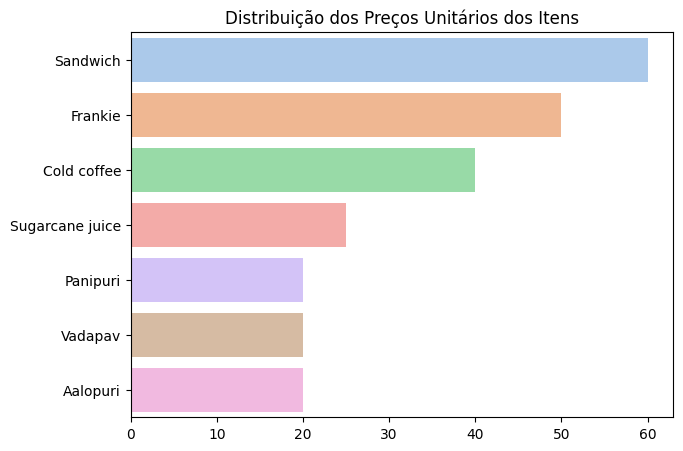

In [22]:
dados = df[['item_name', 'item_price']].sort_values(by='item_price' , ascending=False)

plt.figure(figsize=(7,5))
grafico = sns.barplot(x=dados.item_price, y=dados.item_name, palette='pastel')
grafico.set(title='Distribuição dos Preços Unitários dos Itens', xlabel='', ylabel='')
plt.show()

#### 2.6 Quanto é o faturamento por tipo de item?

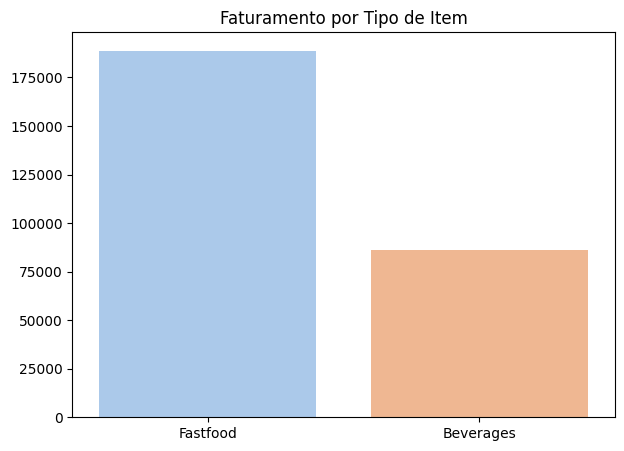

In [24]:
dados = df.groupby('item_type')['transaction_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(7,5))
grafico = sns.barplot(x=dados.index, y=dados.values, palette='pastel')
grafico.set(title='Faturamento por Tipo de Item', xlabel='', ylabel='')
plt.show()

#### 2.7 Existe alguma correlação entre o preço do item e a quantidade vendida?

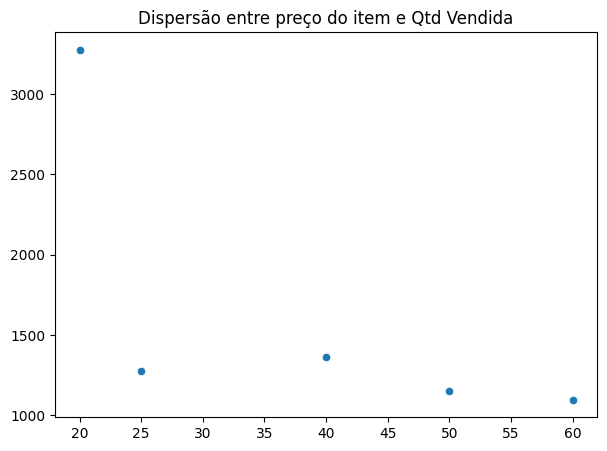

In [26]:
dados = df[['item_price', 'quantity']].groupby('item_price').sum().quantity.sort_values(ascending=False)

plt.figure(figsize=(7,5))
grafico = sns.scatterplot(x=dados.index, y=dados.values)
grafico.set(title='Dispersão entre preço do item e Qtd Vendida', xlabel='', ylabel='')
plt.show()

In [29]:
# Calculando correlacao de Pearson
correlacao, p_valor = pearsonr(dados.index, dados.values)
print(correlacao)

-0.6961962117331651


- Correlação negativa, quanto menor o preço, maior serão as vendas

#### 2.8 Quanto vendemos por periodo do dia?

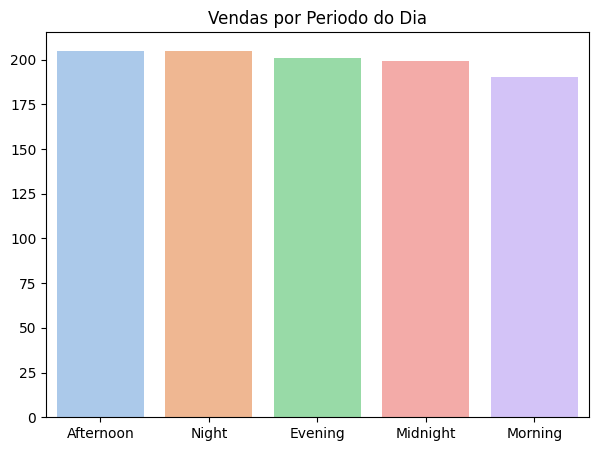

In [32]:
dados = df.groupby('time_of_sale')['time_of_sale'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(7,5))
grafico = sns.barplot(x=dados.index, y=dados.values, palette='pastel')
grafico.set(title='Vendas por Periodo do Dia', xlabel='', ylabel='')
plt.show()

#### 2.9 Qual é o nosso faturamento por periodo do dia?

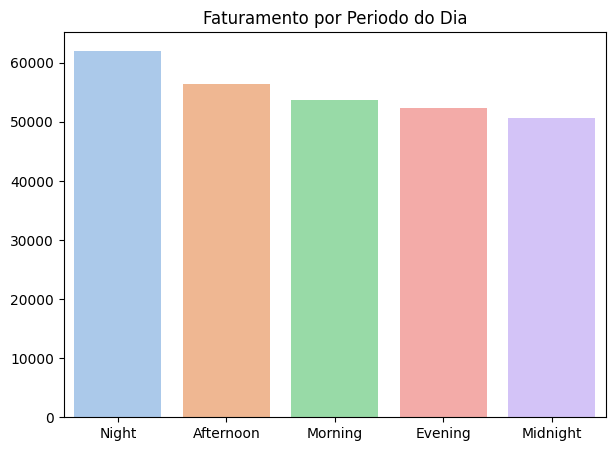

In [31]:
dados = df.groupby('time_of_sale')['transaction_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(7,5))
grafico = sns.barplot(x=dados.index, y=dados.values, palette='pastel')
grafico.set(title='Faturamento por Periodo do Dia', xlabel='', ylabel='')
plt.show()